In [1]:
from datetime import *
import warnings
import itertools
import numpy as np, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'  # k stands for black color


## Times Series Analysis  and Forecasting for n_killed in the data

In [2]:
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

## Data Preprocessing

In [3]:
n_killed = df[['date', 'n_killed']] # these are the two columns am working with
n_killed.sort_values('date')
n_killed.isnull().sum() # checking for null values


date        0
n_killed    0
dtype: int64

In [4]:
n_killed = n_killed.groupby('date')['n_killed'].sum().reset_index() # sum of all n_killed according to date
n_killed.head(15)

,date,n_killed
0,2013-01-01,2
1,2013-01-05,4
2,2013-01-07,6
3,2013-01-19,5
4,2013-01-21,0
5,2013-01-23,2
6,2013-01-25,1
7,2013-01-26,3
8,2013-02-02,0
9,2013-02-03,1


In [5]:
# Indexing in Time Series 
n_killed['date'] = pd.to_datetime(n_killed['date'])

n_killed = n_killed.set_index('date')
n_killed.index

DatetimeIndex(['2013-01-01', '2013-01-05', '2013-01-07', '2013-01-19',
               '2013-01-21', '2013-01-23', '2013-01-25', '2013-01-26',
               '2013-02-02', '2013-02-03',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', name='date', length=1725, freq=None)

In [6]:
n_killed

,n_killed
date,
2013-01-01,2
2013-01-05,4
2013-01-07,6
2013-01-19,5
2013-01-21,0
...,...
2018-03-27,18
2018-03-28,42
2018-03-29,33


In [7]:
#resampling the n_killed from days to month, pls note MS: month beginning, M: month ending, D: days, W: weeks, Y: year
y = n_killed['n_killed'].resample('MS').mean() 
y

date
2013-01-01     2.875000
2013-02-01     1.272727
2013-03-01     1.666667
2013-04-01     2.166667
2013-05-01     1.000000
                ...    
2017-11-01    43.466667
2017-12-01    41.548387
2018-01-01    42.709677
2018-02-01    38.964286
2018-03-01    36.064516
Freq: MS, Name: n_killed, Length: 63, dtype: float64

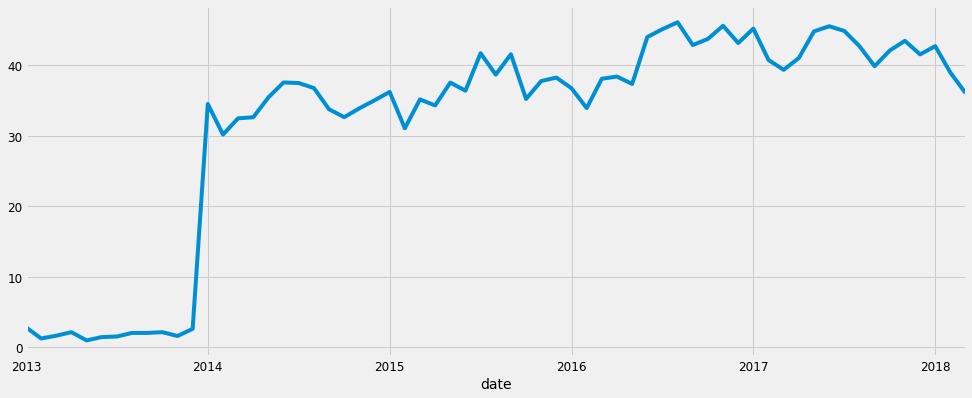

In [8]:
#Visualizing n_killed time series data
y.plot(figsize=(15,6))
plt.show()

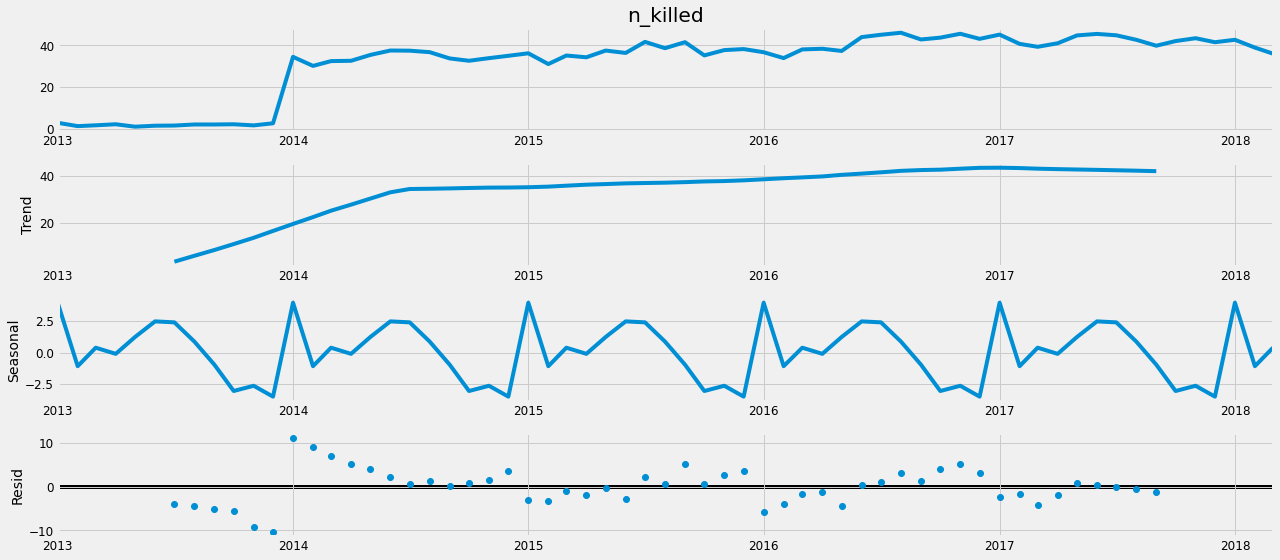

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y,model="additive")
fig = decomposition.plot()
plt.show()

In [11]:
x = n_killed['n_killed'].resample('Q').sum() # Quarterly analysis 
x

date
2013-03-31      62
2013-06-30      71
2013-09-30     103
2013-12-31      81
2014-03-31    2922
2014-06-30    3205
2014-09-30    3315
2014-12-31    3115
2015-03-31    3083
2015-06-30    3251
2015-09-30    3739
2015-12-31    3411
2016-03-31    3304
2016-06-30    3586
2016-09-30    4114
2016-12-31    4062
2017-03-31    3717
2017-06-30    3986
2017-09-30    3911
2017-12-31    3897
2018-03-31    3533
Freq: Q-DEC, Name: n_killed, dtype: int64

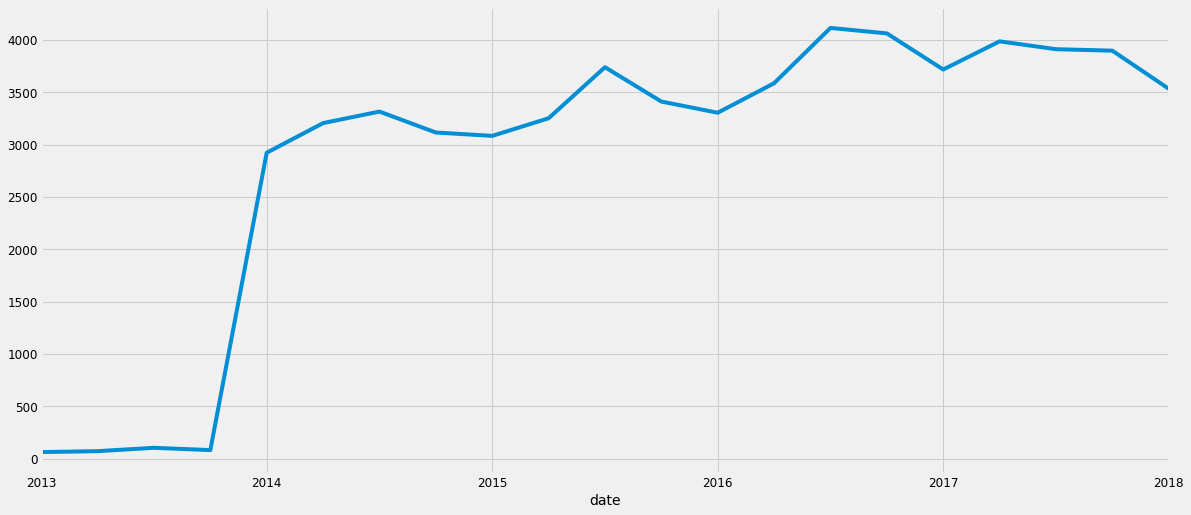

In [12]:
x.plot(kind='line') #graph for quarterly analysis
plt.show()

In [13]:
a = n_killed['n_killed'].resample('Y').sum() #Yearly analysis
a
    

date
2013-12-31      317
2014-12-31    12557
2015-12-31    13484
2016-12-31    15066
2017-12-31    15511
2018-12-31     3533
Freq: A-DEC, Name: n_killed, dtype: int64

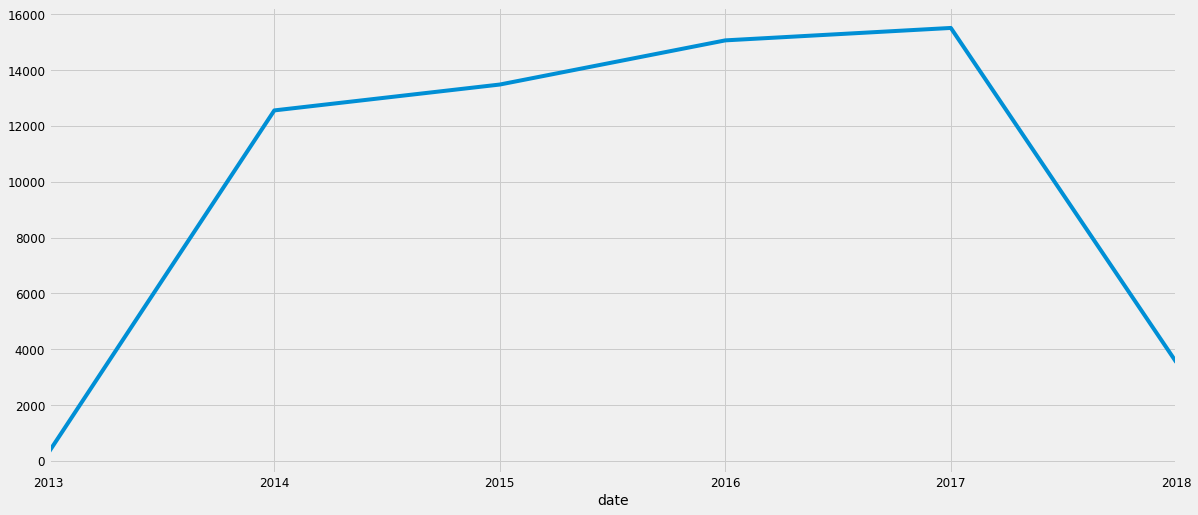

In [14]:
a.plot(kind='line')
plt.show()

## Autoregressive Integrated Moving Avearage(ARIMA): is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 

In [15]:
# Generating the combination to understand how is going to project in the future; 
# ie; how the data is going to change based on the past into the future
# parameters used in arima, p:autoregression, d:integration, q:moving average
# SARIMAX; seasonal autoregressive integrated moving average
p=d=q = range(0,2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[2]))
print("SARIMAX:{} x {}".format(pdq[3],seasonal_pdq[3]))
print("SARIMAX:{} x {}".format(pdq[4],seasonal_pdq[4]))

SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 1, 0) x (0, 1, 0, 12)
SARIMAX:(0, 1, 1) x (0, 1, 1, 12)
SARIMAX:(1, 0, 0) x (1, 0, 0, 12)


In [16]:
# Based on the combination we got earlier, this classificatin is trying to understand how the model is trying to fit for each kind of analysis
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            
            print("ARIMA{}x{}12-AIC:{}".format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:620.364026128832
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:471.65674569137707
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:419.6144216840611
ARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:217.72293474502655
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:431.89173067624716
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:419.99046344331686
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:221.26914756237073
ARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:219.72087799613644
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:545.2263297966156
ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:410.6061685834808
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:366.45087150175846
ARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:207.20214299709767
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:389.4360456575215


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:372.6985574163657
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:215.76863419105524
ARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:209.20159035613207
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:366.5374213835496
ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:239.01532369004582
ARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:306.8484831468983
ARIMA(0, 1, 0)x(0, 1, 1, 12)12-AIC:201.30935650733497
ARIMA(0, 1, 0)x(1, 0, 0, 12)12-AIC:246.27986401113037
ARIMA(0, 1, 0)x(1, 0, 1, 12)12-AIC:240.41799505585632
ARIMA(0, 1, 0)x(1, 1, 0, 12)12-AIC:205.98095005131952


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12-AIC:203.85156811155147
ARIMA(0, 1, 1)x(0, 0, 0, 12)12-AIC:362.25262355523
ARIMA(0, 1, 1)x(0, 0, 1, 12)12-AIC:230.6632774444177
ARIMA(0, 1, 1)x(0, 1, 0, 12)12-AIC:302.06674999550364
ARIMA(0, 1, 1)x(0, 1, 1, 12)12-AIC:187.2267214869048
ARIMA(0, 1, 1)x(1, 0, 0, 12)12-AIC:243.98246688098206
ARIMA(0, 1, 1)x(1, 0, 1, 12)12-AIC:232.21406607767187
ARIMA(0, 1, 1)x(1, 1, 0, 12)12-AIC:195.01225566088692
ARIMA(0, 1, 1)x(1, 1, 1, 12)12-AIC:177.839360096722
ARIMA(1, 0, 0)x(0, 0, 0, 12)12-AIC:373.61637650763635


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12-AIC:247.32490004241882
ARIMA(1, 0, 0)x(0, 1, 0, 12)12-AIC:310.3319990881798
ARIMA(1, 0, 0)x(0, 1, 1, 12)12-AIC:202.07785045954958
ARIMA(1, 0, 0)x(1, 0, 0, 12)12-AIC:248.1361612991504
ARIMA(1, 0, 0)x(1, 0, 1, 12)12-AIC:248.58102616502694
ARIMA(1, 0, 0)x(1, 1, 0, 12)12-AIC:202.07373761925234
ARIMA(1, 0, 0)x(1, 1, 1, 12)12-AIC:194.81016656723347
ARIMA(1, 0, 1)x(0, 0, 0, 12)12-AIC:369.22175086219374
ARIMA(1, 0, 1)x(0, 0, 1, 12)12-AIC:237.2188934652976
ARIMA(1, 0, 1)x(0, 1, 0, 12)12-AIC:305.7889917233595
ARIMA(1, 0, 1)x(0, 1, 1, 12)12-AIC:191.7638143272229
ARIMA(1, 0, 1)x(1, 0, 0, 12)12-AIC:245.97021512645054
ARIMA(1, 0, 1)x(1, 0, 1, 12)12-AIC:238.78241912163242
ARIMA(1, 0, 1)x(1, 1, 0, 12)12-AIC:194.41890743718486
ARIMA(1, 0, 1)x(1, 1, 1, 12)12-AIC:182.0714397752362
ARIMA(1, 1, 0)x(0, 0, 0, 12)12-AIC:367.0748455437556
ARIMA(1, 1, 0)x(0, 0, 1, 12)12-AIC:237.28957263653356
ARIMA(1, 1, 0)x(0, 1, 0, 12)12-AIC:307.3754272785532
ARIMA(1, 1, 0)x(0, 1, 1, 12)12-AIC:1

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,0,12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3471      0.249     -1.394      0.163      -0.835       0.141
ma.L1         -0.3411      0.240     -1.422      0.155      -0.811       0.129
ar.S.L12      -0.0469      0.052     -0.908      0.364      -0.148       0.054
sigma2         7.7760      2.077      3.745      0.000       3.706      11.846


### How the data is being forecasted

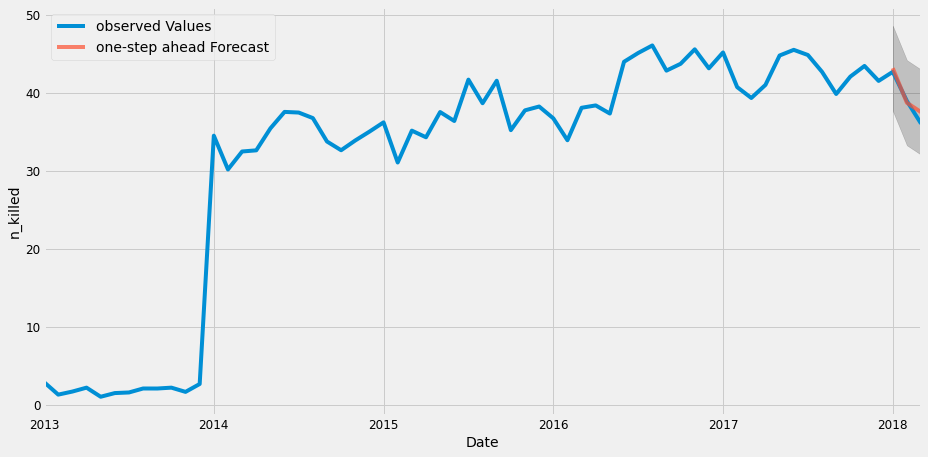

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'),dynamic=False)
pred_ci = pred.conf_int() # getting confidence interval
ax = y['2013':].plot(label='observed Values') # starting the plot from 2013-2018
pred.predicted_mean.plot(ax=ax,label='one-step ahead Forecast', alpha = 0.7, figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("n_killed")
plt.legend()
plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-01-01':]
#compute the mean square error 
mse = ((y_forecasted-y_truth)**2).mean()
print("Mean square error of forecast is {}".format(round(mse,2)))
print("Root mean square error of forecast is {}".format(round(np.sqrt(mse),2))) 

Mean square error of forecast is 0.81
Root mean square error of forecast is 0.9


### Finally , the Forecast

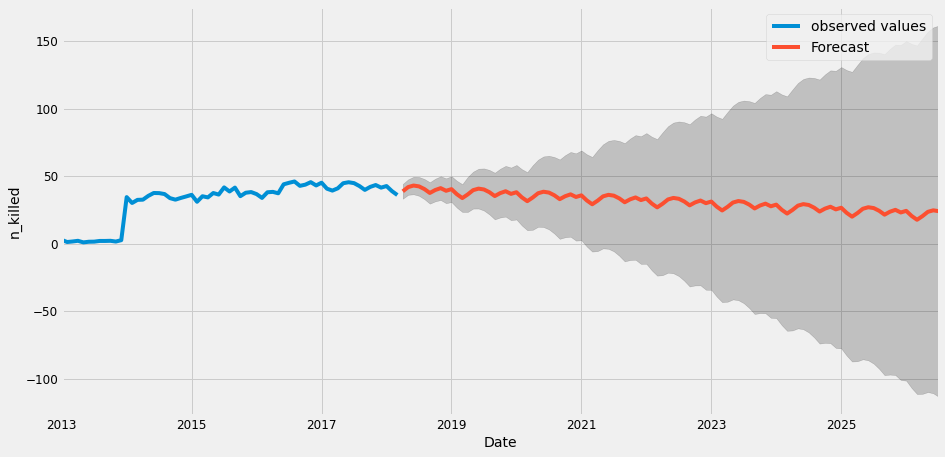

In [20]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax =y.plot(label='observed values',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("n_killed")
plt.legend()
plt.show()

In [ ]:
# from the forecast; we can see that the n_killed is reducing